In [1]:
import tfsites as tf
import _fxns as fxn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# visualize the zrs

In [2]:
dna_sequences_to_annotate='3-zrs-visualize/zrs.txt'

for zi in [None,(320,490)]:
    
    tf.visualizeTfSitesOnSequences(
        dna_sequences_to_annotate,
        binding_site_color={'ETS':  'blue',
                            'LHX':  'green',
                            'HOX':  'yellow',
                            'PBX':  'grey',
                            'HAND2':'pink'},
        
        binding_site_definition={'ETS':  'NNGGANNN',
                                 'LHX':  'NYNRTKNN',
                                 'HOX':  'NNNTWWAN',
                                 'PBX':  'NNNTCWNN',
                                 'HAND2':'CANNYG'},
    
        binding_site_reference_data={'ETS':'0-define-tf-sites/ETS_table.tsv',
                                     'LHX':'0-define-tf-sites/LHX_table.tsv',
                                     'HOX':'0-define-tf-sites/HOX13_table.tsv',
                                     'PBX':'0-define-tf-sites/Pbx_table.tsv'},
        binding_site_min_aff={'ETS':.12,'LHX':.18,'HOX':.2,'PBX':.6},
        pwm_reference_data=None,
        pwm_min_score=0.7,
        pwm_tf_color='grey',
        pwm_pseudocounts=False,
        output_svg=True,
        plot_resolution=150,
        zoom_range=zi,
        output_name=f'human-zrs-zoom',
        out_directory='3-zrs-visualize/',
    )

3-zrs-visualize/human-zrs-zoom_image_seq=hZRS_pos=1-500.png has been created
3-zrs-visualize/human-zrs-zoom_image_seq=hZRS_pos=1-500.svg has been created
3-zrs-visualize/human-zrs-zoom_image_seq=hZRS_pos=501-774.png has been created
3-zrs-visualize/human-zrs-zoom_image_seq=hZRS_pos=501-774.svg has been created
3-zrs-visualize/human-zrs-zoom_image_seq=hZRS_full_range.png has been created
3-zrs-visualize/human-zrs-zoom_table_seq=hZRS.tsv has been created
3-zrs-visualize/human-zrs-zoom_image_seq=hZRS_zoom=320-490.png has been created
3-zrs-visualize/human-zrs-zoom_image_seq=hZRS_zoom=320-490.svg has been created
3-zrs-visualize/human-zrs-zoom_table_seq=hZRS_zoom=320-490.tsv has been created


In [3]:
df=pd.read_csv(f'3-zrs-visualize/human-zrs-zoom_table_seq=hZRS.tsv',sep='\t')
df.head()

,Sequence Name,TF Name,Kmer ID,Kmer,Start Position (1-indexed),End Position (1-indexed),Ref Data Type,Value,Site Direction,Duplicate Kmer IDs,Matrix ID
0,hZRS,HAND2,HAND2:5,CATGCG,615,620,NaN,NaN,+,NaN,NaN
1,hZRS,HAND2,HAND2:4,CACATG,613,618,NaN,NaN,+,NaN,NaN
2,hZRS,HAND2,HAND2:3,CAGATG,416,421,NaN,NaN,+,NaN,NaN
3,hZRS,HAND2,HAND2:2,CAGGTG,226,231,NaN,NaN,+,NaN,NaN
4,hZRS,HAND2,HAND2:1,CACACG,110,115,NaN,NaN,+,NaN,NaN


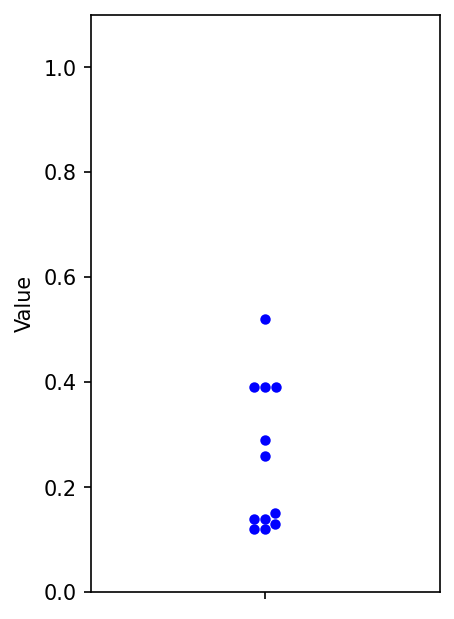

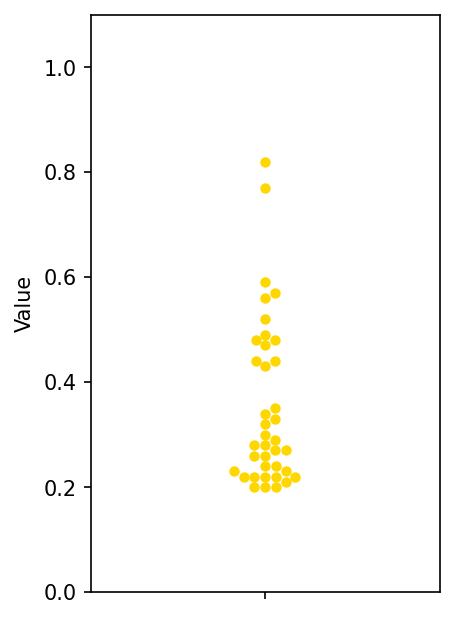

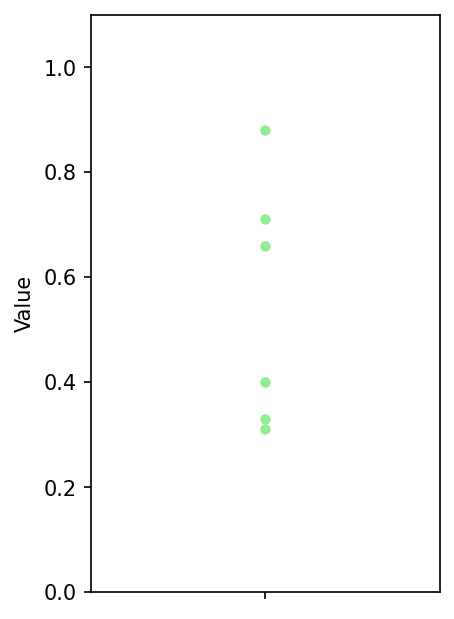

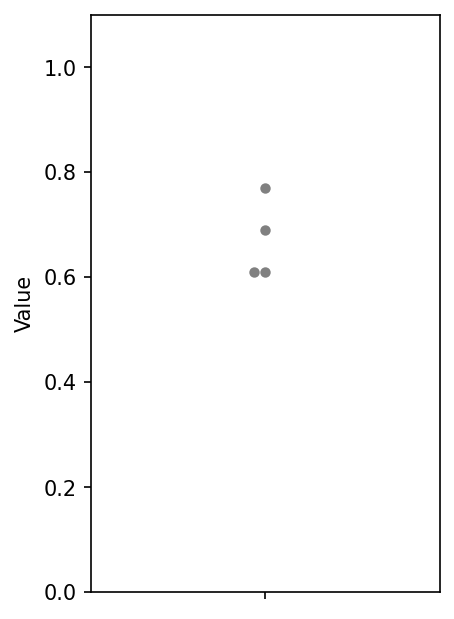

In [4]:
# plot swarmplots

plotlist=[
    ('ETS','blue',      5),
    ('HOX','gold',      5),
    ('LHX','lightgreen',5),
    ('PBX','grey',      5),
]

for tfi,color,s in plotlist:

    fig,ax=fxn.quickfig(3,5)
    
    df=pd.read_csv(f'3-zrs-visualize/human-zrs-zoom_table_seq=hZRS.tsv',sep='\t')
    df=df.loc[df['TF Name']==tfi,:]
    sns.swarmplot(data=df['Value'],color=color,s=5)

    ax.set_ylim(0,1.1)
    fig.savefig(f'3-zrs-visualize/{tfi}.svg')

    plt.show()

# in silico mutagenesis for ETS, all types of effects

In [5]:
tf_name='ETS'
tf_binding_site_definition='NNGGANNN'
tf_aff_data='0-define-tf-sites/ETS_table.tsv'

tf.findTfSitesAlteredBySequenceVariation(
    dna_sequences_to_annotate,
    tf_name,
    tf_binding_site_definition=tf_binding_site_definition,
    tf_aff_data=tf_aff_data,
    tf_min_affinity=0.12,
    tf_pwm_data=None,
    tf_min_score=0.7,
    tf_pseudocounts=False,
    snv_effects_to_report='all',
    plot_denovo_sites=False,
    optimization_threshold=1.25,
    suboptimization_threshold=1.25,
    only_snv_table=True,
    plot_resolution=150,
    output_svg=True,
    zoom_range=(320,490),
    output_name=f'human-zrs-insilico-mut-{tf_name}',
    out_directory='3-zrs-visualize/',
)

3-zrs-visualize/human-zrs-insilico-mut-ETS_table_seq=hZRS_zoom=320-490.tsv has been created
3-zrs-visualize/human-zrs-insilico-mut-ETS_image_seq=hZRS_zoom=320-490.png has been created
3-zrs-visualize/human-zrs-insilico-mut-ETS_image_seq=hZRS_zoom=320-490.svg has been created


# in silico mutagenesis for all tfs, de novo only

In [6]:
tflist=[
    ('ETS','NNGGANNN','0-define-tf-sites/ETS_table.tsv'),
    ('HOX','NNNTWAAN','0-define-tf-sites/HOX13_table.tsv'),
    ('LHX','NYNRTKNN','0-define-tf-sites/LHX_table.tsv'),
    ('PBX','NNNTCWNN','0-define-tf-sites/Pbx_table.tsv'),
]

for tf_name,tf_binding_site_definition,tf_aff_data in tflist:

    print(tf_name,tf_binding_site_definition)
    
    tf.findTfSitesAlteredBySequenceVariation(
        dna_sequences_to_annotate,
        tf_name,
        tf_binding_site_definition=tf_binding_site_definition,
        tf_aff_data=tf_aff_data,
        tf_min_affinity=0.12,
        tf_pwm_data=None,
        tf_min_score=0.7,
        tf_pseudocounts=False,
        snv_effects_to_report='denovo',
        plot_denovo_sites=False,
        optimization_threshold=1.25,
        suboptimization_threshold=1.25,
        only_snv_table=True,
        plot_resolution=150,
        output_svg=True,
        zoom_range=None,
        output_name=f'human-zrs-insilico-mut-{tf_name}',
        out_directory='3-zrs-visualize/zrs-denovos/',
    )

ETS NNGGANNN
3-zrs-visualize/zrs-denovos/human-zrs-insilico-mut-ETS_table_seq=hZRS.tsv has been created
3-zrs-visualize/zrs-denovos/human-zrs-insilico-mut-ETS_image_seq=hZRS_pos=1-500.png has been created
3-zrs-visualize/zrs-denovos/human-zrs-insilico-mut-ETS_image_seq=hZRS_pos=1-500.svg has been created
3-zrs-visualize/zrs-denovos/human-zrs-insilico-mut-ETS_image_seq=hZRS_pos=501-774.png has been created
3-zrs-visualize/zrs-denovos/human-zrs-insilico-mut-ETS_image_seq=hZRS_pos=501-774.svg has been created
3-zrs-visualize/zrs-denovos/human-zrs-insilico-mut-ETS_image_seq=hZRS_full_range.png has been created
HOX NNNTWAAN
3-zrs-visualize/zrs-denovos/human-zrs-insilico-mut-HOX_table_seq=hZRS.tsv has been created
3-zrs-visualize/zrs-denovos/human-zrs-insilico-mut-HOX_image_seq=hZRS_pos=1-500.png has been created
3-zrs-visualize/zrs-denovos/human-zrs-insilico-mut-HOX_image_seq=hZRS_pos=1-500.svg has been created
3-zrs-visualize/zrs-denovos/human-zrs-insilico-mut-HOX_image_seq=hZRS_pos=501-77

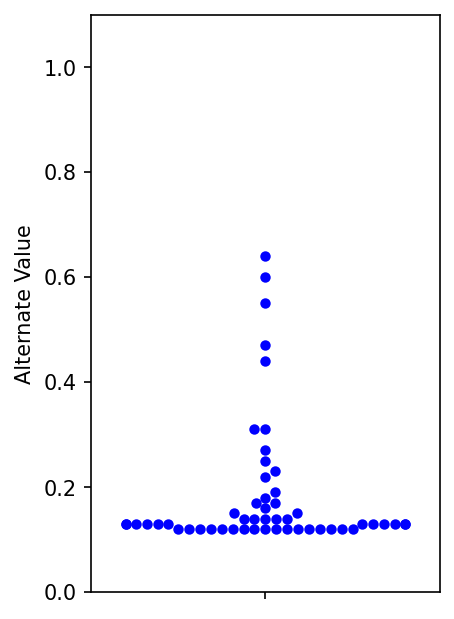

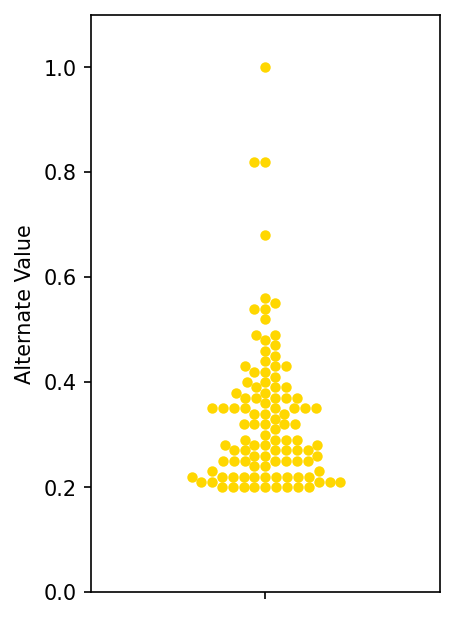

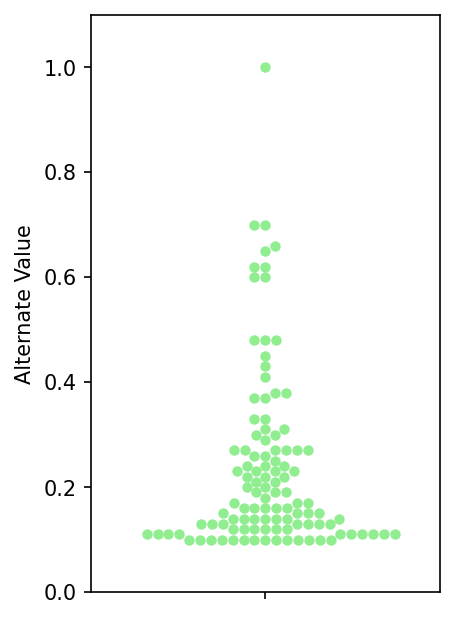

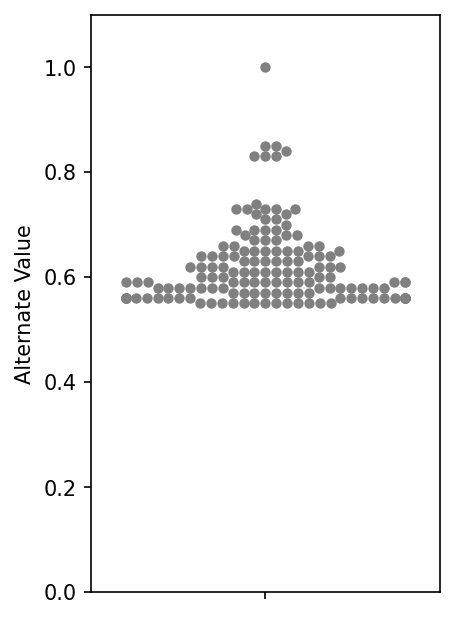

In [7]:
# plot swarmplots
    

tfi='ETS'
color='blue'
s=2.5

plotlist=[
    ('ETS','blue',      5,.12),
    ('HOX','gold',      5,.2),
    ('LHX','lightgreen',5,.1),
    ('PBX','grey',      5,.55),
]

for tfi,color,s,mindnvaff in plotlist:

    fig,ax=fxn.quickfig(3,5)
    
    df=pd.read_csv(f'3-zrs-visualize/zrs-denovos/human-zrs-insilico-mut-{tfi}_table_seq=hZRS.tsv',sep='\t')
    df=df.loc[df['Alternate Value']>=mindnvaff,:]
    sns.swarmplot(data=df['Alternate Value'],color=color,s=5)

    ax.set_ylim(0,1.1)
    fig.savefig(f'3-zrs-visualize/zrs-denovos/{tfi}.svg')

    plt.show()